In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

data_cleaning_path = "data_cleaning.csv"

data_cleaning_df = pd.read_csv(data_cleaning_path).drop("Unnamed: 0", axis=1)
data_cleaning_df.head()

,State,"$15,000 - 24,999","$25,000 - 34,999","$35,000 - 49,999","$50,000+",1-13 days when mental health not good,1-13 days when physical health not good,14+ days when mental health not good,14+ days when physical health not good,18-24 years,...,Some post-H.S.,Student,Unable to work,"White, non-Hispanic",Widowed,Depression Diagnosis,Zero days when mental health not good,Zero days when physical health not good,State Code,GeoLocation
0,Alabama,20.0,10.4,14.6,42.9,24.5,23.4,17.5,16.0,12.2,...,31.7,4.9,13.7,67.5,8.0,52.725,58.0,60.6,AL,"(32.84057112200048, -86.63186076199969)"
1,Alaska,12.3,8.9,12.5,60.4,24.8,29.0,12.0,9.8,12.8,...,36.3,3.9,5.6,63.6,4.6,52.325,63.1,61.2,AK,"(64.84507995700051, -147.72205903599973)"
2,All States and DC (median) **,14.9,9.8,13.8,52.7,25.0,24.6,13.8,12.6,12.4,...,31.6,5.1,6.3,73.3,6.8,51.925,61.4,63.1,UW,NaN
3,"All States, DC and Territories (median) **",15.0,9.8,13.8,52.5,24.9,24.6,13.8,12.6,12.4,...,31.4,5.1,6.3,71.9,6.8,51.925,61.4,63.0,US,NaN
4,Arizona,17.8,10.9,14.5,48.1,25.6,25.6,14.4,13.2,12.5,...,35.0,5.3,6.2,58.4,6.8,49.325,60.0,61.2,AZ,"(34.865970280000454, -111.76381127699972)"


In [2]:
data_cleaning_df.columns

Index(['State', '$15,000 - 24,999', '$25,000 - 34,999', '$35,000 -  49,999',
       '$50,000+', '1-13 days when mental health not good',
       '1-13 days when physical health not good',
       '14+ days when mental health not good',
       '14+ days when physical health not good', '18-24 years', '25-34 years',
       '35-44 years', '45-54 years', '55-64 years', '65+ years',
       'American Indian or Alaskan native, non-Hispanic',
       'Asian, non-Hispanic', 'Black, non-Hispanic', 'College+', 'Divorced',
       'Employed', 'Female', 'H.S. or G.E.D.', 'Hispanic', 'Homemaker',
       'Less than $15,000', 'Less than H.S.', 'Male', 'Married',
       'Multiracial, non-Hispanic',
       'Native Hawaiian or other Pacific Islander, non-Hispanic',
       'Never married', 'No Depression Diagnosis', 'No work >yr',
       'No work< yr', 'Other race, non-Hispanic', 'Partnered', 'Retired',
       'Self-employed', 'Separated', 'Some post-H.S.', 'Student',
       'Unable to work', 'White, non-Hispa

In [31]:
#label = f"{data_cleaning_df['State Code']}"
#data_cleaning_df.info()

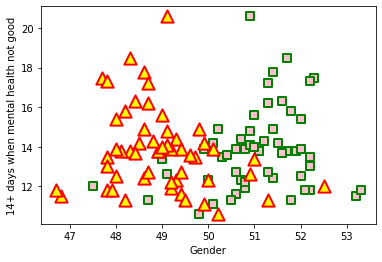

In [26]:
x_female=data_cleaning_df["Female"]
x_male=data_cleaning_df["Male"]
y=data_cleaning_df["14+ days when mental health not good"].astype(float)
plt.scatter(x_female, y, c ="pink", linewidths = 2, marker ="s", edgecolor ="green", s = 50)
plt.scatter(x_male, y, c ="yellow",linewidths = 2,marker ="^", edgecolor ="red", s = 150)
plt.xlabel("Gender")
plt.ylabel("14+ days when mental health not good")
plt.show()

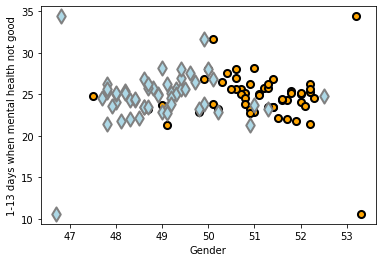

In [31]:
x_female=data_cleaning_df["Female"]
x_male=data_cleaning_df["Male"]
y=data_cleaning_df["1-13 days when mental health not good"].astype(float)
plt.scatter(x_female, y, c ="orange", linewidths = 2, marker ="o", edgecolor ="black", s = 50)
plt.scatter(x_male, y, c ="lightblue",linewidths = 2,marker ="d", edgecolor ="grey", s = 100)
plt.xlabel("Gender")
plt.ylabel("1-13 days when mental health not good")
plt.show()

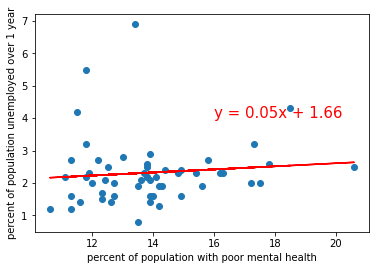

In [39]:
x=data_cleaning_df["14+ days when mental health not good"].astype(float)
y=data_cleaning_df["No work >yr"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(16,4),fontsize=15,color="red")
plt.xlabel("percent of population with poor mental health")
plt.ylabel("percent of population unemployed over 1 year")
plt.show()

In [43]:
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.1


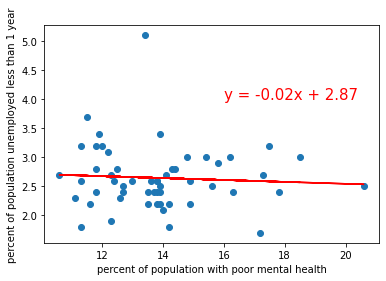

In [42]:
x=data_cleaning_df["14+ days when mental health not good"].astype(float)
y1=data_cleaning_df["No work< yr"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y1)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y1)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(16,4),fontsize=15,color="red")
plt.xlabel("percent of population with poor mental health")
plt.ylabel("percent of population unemployed less than 1 year")
plt.show()

In [44]:
correlation_1 = st.pearsonr(x,y1)
print(f"The correlation between both factors is {round(correlation_1[0],2)}")

The correlation between both factors is -0.06


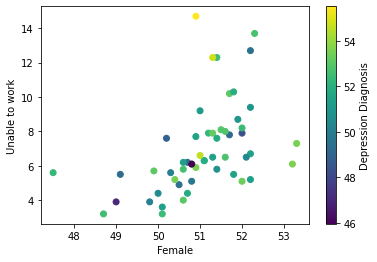

In [48]:
plt.scatter(data_cleaning_df['Female'],data_cleaning_df['Unable to work'],c=data_cleaning_df['Depression Diagnosis'])
clb = plt.colorbar()
plt.xlabel("Female")
plt.ylabel("Unable to work")
clb.set_label("Depression Diagnosis")
plt.show()

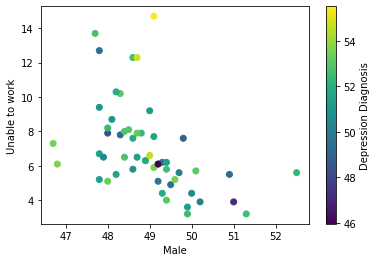

In [54]:
plt.scatter(data_cleaning_df['Male'],data_cleaning_df['Unable to work'],c=data_cleaning_df['Depression Diagnosis'])
clb = plt.colorbar()
plt.xlabel("Male")
plt.ylabel("Unable to work")
clb.set_label("Depression Diagnosis")
plt.show()

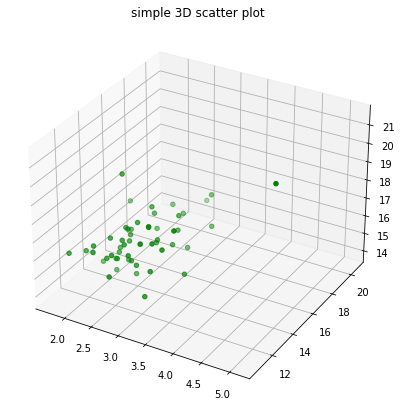

In [57]:
z = data_cleaning_df['35-44 years']
x = data_cleaning_df['No work< yr']
y = data_cleaning_df['14+ days when mental health not good']
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [82]:
over_1year_group = data_cleaning_df.groupby('State Code')
count = over_1year_group["No work >yr"].sum()
count.head()

State Code
AK    2.0
AL    2.0
AR    2.6
AZ    2.4
CA    2.3
Name: No work >yr, dtype: float64

In [80]:
over_14day_group = data_cleaning_df.groupby('State Code')
counts = over_14day_group["14+ days when mental health not good"].sum()
counts.head()

State Code
AK    12.0
AL    17.5
AR    17.8
AZ    14.4
CA    11.9
Name: 14+ days when mental health not good, dtype: float64

In [84]:
combine = pd.merge(count, counts, on='State Code')
combine.head()

,No work >yr,14+ days when mental health not good
State Code,,
AK,2.0,12.0
AL,2.0,17.5
AR,2.6,17.8
AZ,2.4,14.4
CA,2.3,11.9


<AxesSubplot:xlabel='State Code'>

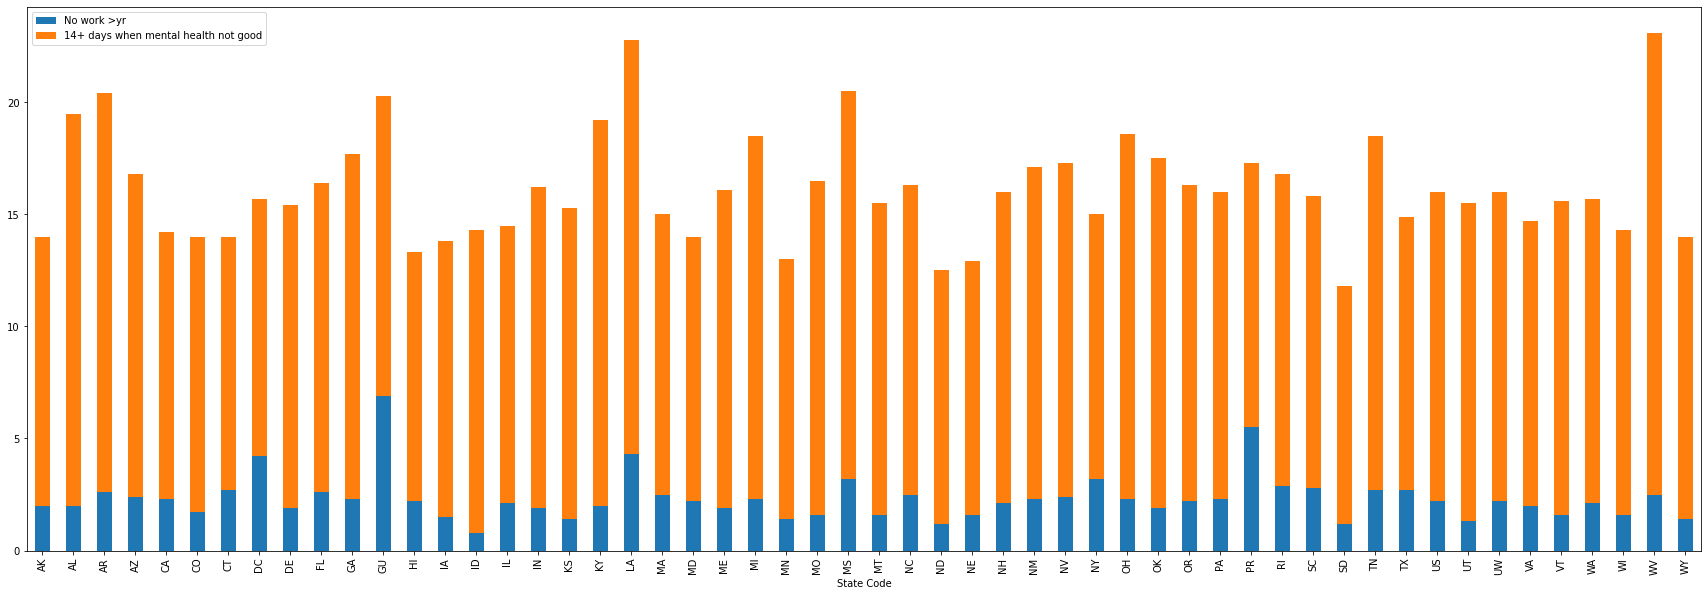

In [96]:
combine.plot(kind='bar', stacked=True, figsize=[30,10] )